In [1]:
import seaborn as sns; sns.set()

In [2]:
import h5py
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

/Users/mtuncel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
h5 = h5py.File('../cr_out/cnv_data.h5')

In [4]:
list(h5.keys())

['cell_barcodes',
 'cnvs',
 'constants',
 'genome_tracks',
 'normalized_counts',
 'raw_counts',
 'tree']

In [5]:
h5['cell_barcodes'].value

array([b'AAATGCCGTAGGATAT-1', b'ACGCCGACATACGTTG-1',
       b'AGGGTGAGTCGCGTCA-1', b'CACACCTCATTTGCGA-1',
       b'CTACATTTCTAAGTGC-1', b'GGCCGATGTACTCCGG-1',
       b'GGGTTGCCAGGTCCCA-1', b'TCCCGATCACTTGAGT-1',
       b'TGACTTTGTAAGCGCA-1', b'TGATTTCGTTGAACTC-1'], dtype='|S18')

In [6]:
list(h5['genome_tracks'].keys())

['gc_fraction', 'is_mappable', 'mappability', 'n_fraction']

In [7]:
list(h5['constants'].keys())

['bin_size',
 'chroms',
 'num_bins_per_chrom',
 'num_cells',
 'num_chroms',
 'num_nodes']

In [8]:
h5['constants']['bin_size'].value

20000

In [9]:
h5['constants']['chroms'].value

array([b'mg1655_chr1'], dtype='|S11')

In [10]:
h5['constants']['num_chroms'].value

1

In [11]:
h5['constants']['num_bins_per_chrom'].value

array([51])

In [12]:
cnvs_arr = h5['cnvs']['mg1655_chr1'].value

In [13]:
cnvs_arr.shape

(19, 51)

In [14]:
# np.savetxt("cnvs_arr.tsv", cnvs_arr, delimiter="\t")

In [18]:
arr = cnvs_arr

In [19]:
#arr[arr < -10] = -2

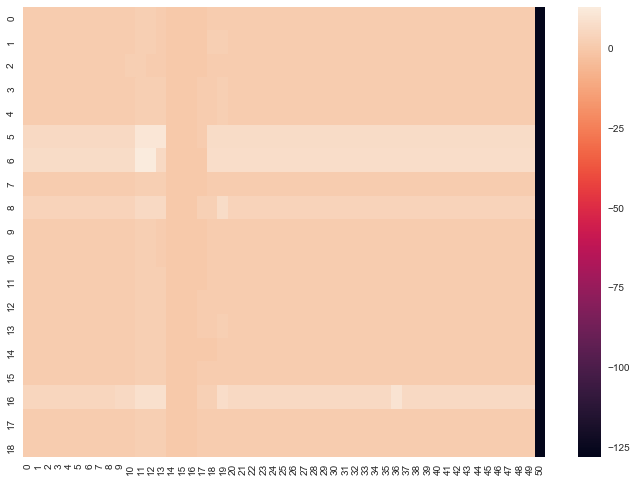

In [20]:
ax = sns.heatmap(arr)

In [15]:
list(h5['constants'].keys())

['bin_size',
 'chroms',
 'num_bins_per_chrom',
 'num_cells',
 'num_chroms',
 'num_nodes']

In [16]:
h5['constants']['bin_size'].value

20000

In [17]:
h5['normalized_counts']['15'].value.shape

(487, 5127)

In [21]:
list(h5['normalized_counts'].keys())

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'X',
 'Y']

In [7]:
norm_counts[0].shape

(51,)

In [21]:
size = norm_counts[0].shape[0]

In [26]:
norm_counts.shape

(19, 51)

In [35]:
mat1 = norm_counts.T

In [41]:
mat1

array([[8.2000e+01, 3.4000e+01, 2.8000e+01, 5.5000e+01, 3.4500e+01,
        5.6500e+01, 1.7000e+01, 4.8000e+01, 2.4000e+01, 8.8000e+01,
        1.1000e+02, 8.9000e+01, 1.5800e+02, 1.2350e+02, 2.4600e+02,
        3.6950e+02, 7.3500e+01, 3.9350e+02, 4.6700e+02],
       [7.2500e+01, 3.5000e+01, 3.0000e+01, 6.0500e+01, 4.3000e+01,
        6.1500e+01, 2.5000e+01, 5.8000e+01, 2.6000e+01, 8.7500e+01,
        1.0250e+02, 9.5500e+01, 1.6050e+02, 1.3850e+02, 2.4800e+02,
        3.8650e+02, 8.6500e+01, 4.1250e+02, 4.9900e+02],
       [7.1500e+01, 3.7500e+01, 3.2000e+01, 4.8000e+01, 3.3500e+01,
        6.1500e+01, 3.7000e+01, 5.2000e+01, 2.7000e+01, 8.1500e+01,
        1.0350e+02, 8.5500e+01, 1.5550e+02, 1.1900e+02, 2.3700e+02,
        3.5600e+02, 9.8500e+01, 3.8300e+02, 4.8150e+02],
       [8.8000e+01, 3.2500e+01, 2.5500e+01, 4.6000e+01, 3.3500e+01,
        5.8500e+01, 2.1000e+01, 4.9000e+01, 2.9000e+01, 9.7000e+01,
        1.1350e+02, 7.8500e+01, 1.6250e+02, 1.1200e+02, 2.5950e+02,
        3.715

In [48]:
norm_counts.T[16]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1.], dtype=float32)

### Computing the probabilities

In [8]:
# consider cell 0 and bins 0:6
norm_counts[0][0:6]

array([82. , 72.5, 71.5, 88. , 80.5, 75. ], dtype=float32)

In [26]:
norm_counts.shape

(19, 51)

In [27]:
# np.savetxt('norm_counts.tsv',norm_counts)

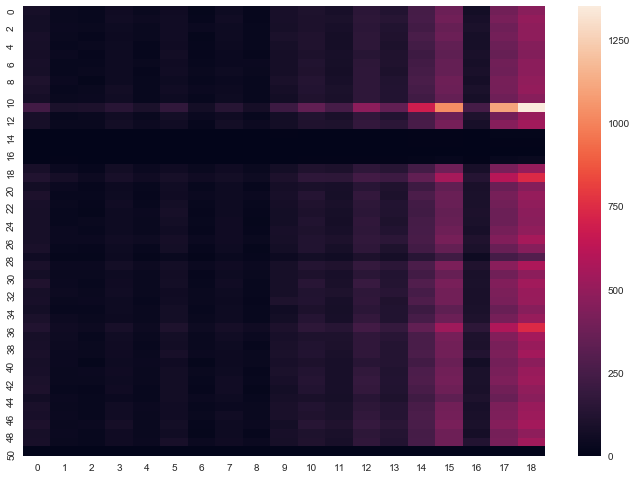

In [9]:
ax = sns.heatmap(norm_counts.T)

In [10]:
dd['constants']

{'bin_size': 20000,
 'chroms': array([b'mg1655_chr1'], dtype='|S11'),
 'num_bins_per_chrom': array([51]),
 'num_cells': 10,
 'num_chroms': 1,
 'num_nodes': 19}

In [12]:
cnv_profile = dd['cnvs']['mg1655_chr1']

In [13]:
cnv_profile = cnv_profile[0:19, 0:50]

In [14]:
cnv_profile.shape

(19, 50)

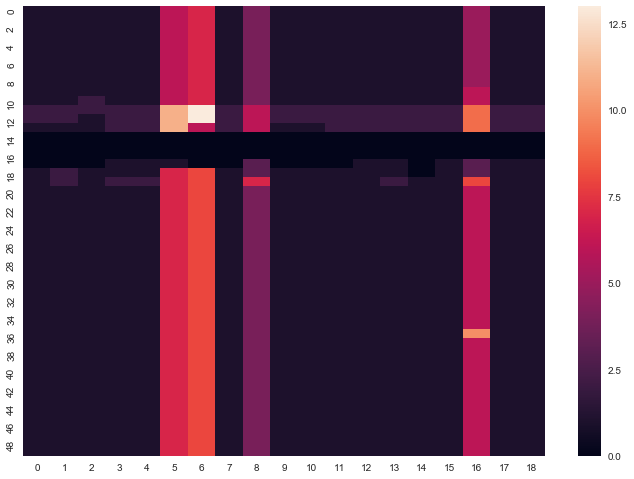

In [15]:
ax = sns.heatmap(cnv_profile.T)

In [16]:
dd['tree']['is_cell_in_group']

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)

In [17]:
dd['tree']['is_cell_in_group'].shape

(9, 10)

In [18]:
dd['genome_tracks']

{'gc_fraction': {'mg1655_chr1': array([0.51005, 0.52925, 0.52165, 0.5459 , 0.5224 , 0.5224 , 0.525  ,
         0.47755, 0.5397 , 0.5097 , 0.52965, 0.48765, 0.50945, 0.53125,
         0.5469 , 0.4802 , 0.5109 , 0.5304 , 0.53915, 0.4965 , 0.512  ,
         0.5242 , 0.51335, 0.51315, 0.5244 , 0.52945, 0.51185, 0.51835,
         0.4463 , 0.4944 , 0.52165, 0.53   , 0.5024 , 0.49905, 0.5167 ,
         0.49975, 0.51945, 0.51495, 0.51285, 0.51155, 0.52145, 0.5326 ,
         0.50655, 0.5089 , 0.5087 , 0.52675, 0.51895, 0.4903 , 0.52195,
         0.50155, 0.5    ])},
 'is_mappable': {'mg1655_chr1': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True, Fa

In [25]:
tree = dd['tree']

In [27]:
Z = tree['Z']

In [28]:
Z[0]

array([ 34., 105.,   7.,   2.], dtype=float32)

In [29]:
Z = Z.astype(np.float64, copy=False)

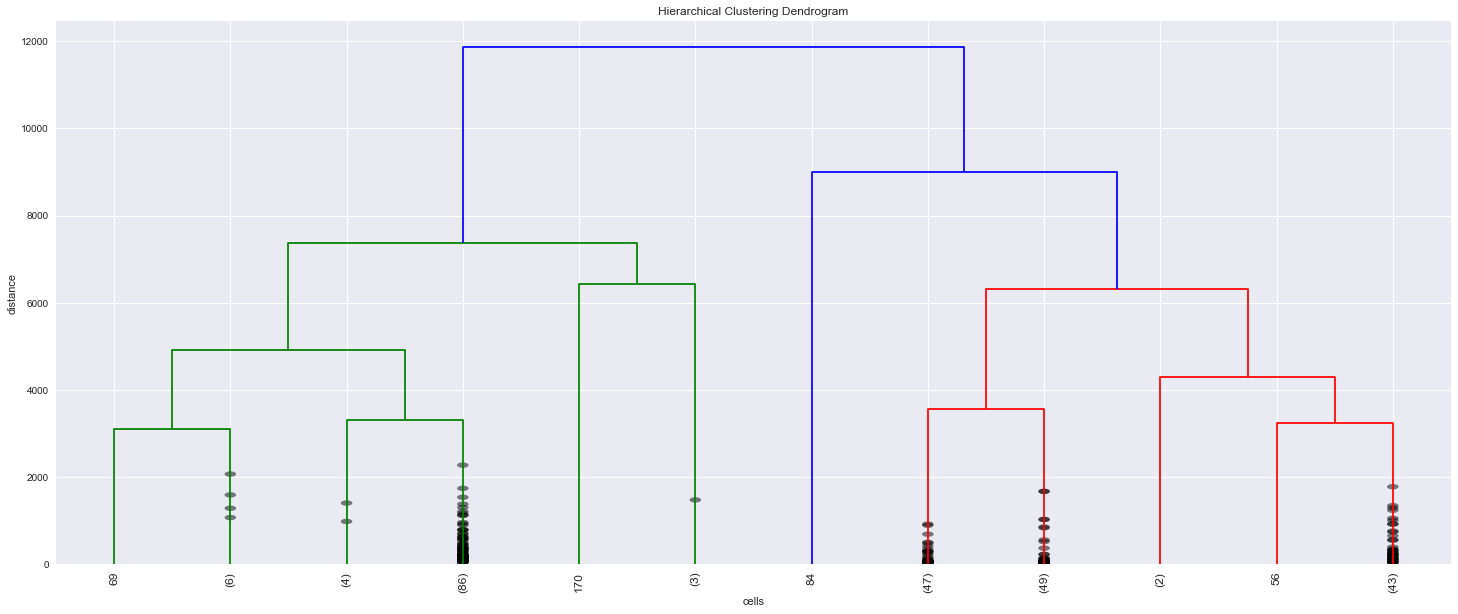

In [77]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('cells')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)
plt.show()